# Imports

In [16]:
import tensorflow as tf
# from tensorflow import keras
import matplotlib.pyplot as plt

# Prepare Data

## Define destination folder path and extract zipped file

In [17]:
zip_file_path = "./happy-or-sad.zip"
data_path = "./happy-or-sad"

In [18]:
# extract zipped file
from zipfile import ZipFile


In [19]:
with ZipFile(zip_file_path, 'r') as zip:  
    
    zip.extractall()

# Model

## design the model

In [20]:
# This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
model = tf.keras.models.Sequential([
    # define model with preprocessor layer and 3 CNN layers
    tf.keras.layers.Rescaling(scale=1./255, offset=0.0,input_shape=[150, 150, 3]),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1,
                        padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                        padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1,
                        padding="same", activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

    
])

model.compile(
    loss='binary_crossentropy',
    optimizer="Adam" , # define optimizer
    metrics=['accuracy']
    )

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 conv2d_8 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 flatten_2 (Flatten)         (None, 1440000)           0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1440001   
                                                                 
Total params: 1,463,585
Trainable params: 1,463,585
No

In [22]:
tst= tf.ones([1,28,28,3])
res = model(tst)
tst.shape,res.shape

ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 150, 150, 3), found shape=(1, 28, 28, 3)

## Define early stop at desired accuracy reach

In [23]:
DESIRED_ACCURACY = 0.99

class myCallback(tf.keras.callbacks.Callback):
    # define canceling training condition
    
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('val_accuracy') > DESIRED_ACCURACY:
            self.model.stop_training = True


callbacks = myCallback()

## Create a dataset

In [24]:
batch_size = 32
img_height = img_width = 150
validation_split=0.1

In [25]:
tf.keras.preprocessing.image_dataset_from_directory(
    "/home/mohammad/Documents/1401-05-24",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=10,
    validation_split=validation_split,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 160 files belonging to 4 classes.
Using 144 files for training.


<BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/mohammad/Documents/1401-05-24/data",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=10,
    validation_split=validation_split,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/mohammad/Documents/1401-05-24/data",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=10,
    validation_split=validation_split,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 80 files belonging to 2 classes.
Using 72 files for training.
Found 80 files belonging to 2 classes.
Using 8 files for validation.


In [27]:
class_names = train_ds.class_names
print(class_names)

['happy', 'sad']


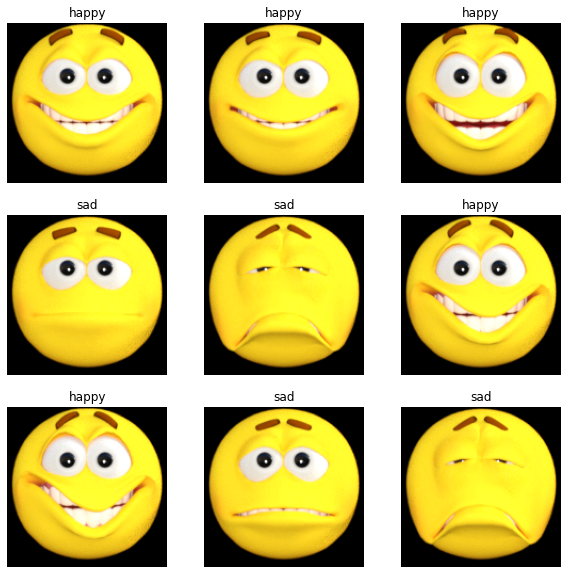

In [28]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [29]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    verbose=1, callbacks=[callbacks])
history.history['accuracy'][-1], history.history['val_accuracy'][-1]

Epoch 1/20


2022-08-15 19:17:37.116418: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 184320000 exceeds 10% of free system memory.
2022-08-15 19:17:37.364468: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 184320000 exceeds 10% of free system memory.


1/3 [=========>....................] - ETA: 4s - loss: 0.6820 - accuracy: 0.5938

2022-08-15 19:17:38.727043: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 184320000 exceeds 10% of free system memory.
2022-08-15 19:17:38.972032: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 184320000 exceeds 10% of free system memory.


3/3 [==============================] - 4s 1s/step - loss: 8.6513 - accuracy: 0.5972 - val_loss: 3.1838 - val_accuracy: 0.7500
Epoch 2/20


2022-08-15 19:17:41.090822: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 184320000 exceeds 10% of free system memory.


3/3 [==============================] - 4s 1s/step - loss: 5.2733 - accuracy: 0.5278 - val_loss: 3.0012 - val_accuracy: 0.2500
Epoch 3/20
3/3 [==============================] - 3s 979ms/step - loss: 1.7580 - accuracy: 0.5278 - val_loss: 0.4393 - val_accuracy: 0.8750
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 0.5918 - accuracy: 0.6944 - val_loss: 0.2321 - val_accuracy: 1.0000


(0.6944444179534912, 1.0)